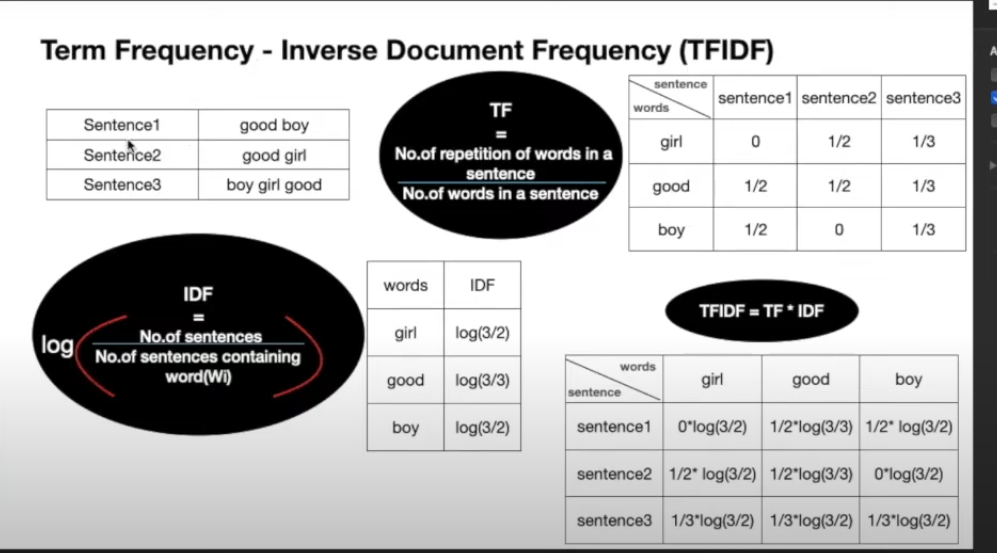

In [1]:
docA="good boy"
docB="good girl"
docC="boy girl good"

In [7]:
bowA=docA.split(" ")
bowB=docB.split(" ")
bowC=docC.split(" ")
print(bowA)
wordSet=set(bowA).union(set(bowB)).union(set(bowC))
wordSet


['good', 'boy']


{'boy', 'girl', 'good'}

In [8]:
wordDictA=dict.fromkeys(wordSet,0)
wordDictB=dict.fromkeys(wordSet,0)
wordDictC=dict.fromkeys(wordSet,0)
for word in bowA:
    wordDictA[word]+=1
for word in bowB:
    wordDictB[word]+=1
for word in bowC:
    wordDictC[word]+=1


In [9]:
print(wordDictA)
print(wordDictB)
print(wordDictC)

{'boy': 1, 'girl': 0, 'good': 1}
{'boy': 0, 'girl': 1, 'good': 1}
{'boy': 1, 'girl': 1, 'good': 1}


In [13]:
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        #TF=No.of repeating words in a sentence/TOtal words in a sentence
        tfDict[word]=count/float(bowCount)
    return tfDict

In [19]:
tfBowA=computeTF(wordDictA,bowA)
tfBowB=computeTF(wordDictB,bowB)
tfBowC=computeTF(wordDictC,bowC)
print("Sentence1:",tfBowA)
print("Sentence2:",tfBowB)
print("Sentence3:",tfBowC)

Sentence1: {'boy': 0.5, 'girl': 0.0, 'good': 0.5}
Sentence2: {'boy': 0.0, 'girl': 0.5, 'good': 0.5}
Sentence3: {'boy': 0.3333333333333333, 'girl': 0.3333333333333333, 'good': 0.3333333333333333}


In [54]:
#IDF
def computeIDF(docList):
    import math
    idfDict={}
    N=len(docList)
    #{'girl':0,'good':0,'boy':0}
    idfDict=dict.fromkeys(docList[0].keys(),0)
    #lets find the number of docs which contain word(Wi)
    for doc in docList:
        for word,val in doc.items():
            if val>0:
                idfDict[word]+=1
    #{'girl':2,'good':3,'boy':2}
    # print(idfDict)
    #IDF Calculation
    for word,val in idfDict.items():
        # idfDict[word]=math.log10(N/float(val)) # this is our forulae
        #for better accuaray we use sklearn formulae
        idfDict[word]=math.log10((N+1)/(float(val)+1.0))+1
        
    return idfDict
                

In [55]:
idfs=computeIDF([wordDictA,wordDictB,wordDictC])
idfs

{'boy': 1.1249387366083, 'girl': 1.1249387366083, 'good': 1.0}

TFIDF

In [56]:
def computeTFIDF(tfBow,idfs):
    tfidf={}
    for word,val in tfBow.items():
        tfidf[word]=val*idfs[word]
    return tfidf

In [57]:
tfidBowA=computeTFIDF(tfBowA,idfs)
tfidBowB=computeTFIDF(tfBowB,idfs)
tfidBowC=computeTFIDF(tfBowC,idfs)
print(tfidBowA)

{'boy': 0.56246936830415, 'girl': 0.0, 'good': 0.5}


In [58]:
import pandas as pd
pd.DataFrame([tfidBowA,tfidBowB,tfidBowC])


,boy,girl,good
0,0.562469,0.000000,0.500000
1,0.000000,0.562469,0.500000
2,0.374980,0.374980,0.333333


In [ ]:
#Check if our algo is correct or not now we use scklen model

In [32]:
docA="good boy"
docB="good girl"
docC="boy girl good"
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf=TfidfVectorizer()
response=tfidf.fit_transform([docA,docB,docC])

In [35]:
response

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (3, 3)>

In [42]:
pd.DataFrame(response.toarray(),columns=tfidf.get_feature_names_out())

,boy,girl,good
0,0.789807,0.000000,0.613356
1,0.000000,0.789807,0.613356
2,0.619805,0.619805,0.481334


In [ ]:
# The IDF score tells you how rare the word is across all documents.

# A higher IDF = the word appears in fewer documents = more unique/important.

In [ ]:
# IDF Score	What it means
# High IDF	The word appears in fewer documents → more unique → potentially more important for distinguishing documents
# Low IDF	The word appears in many documents → very common → less useful for distinguishing documents